In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random

In [76]:
def prepare_grid(grid_size, obstacle_ratio):
    grid = np.zeros((grid_size, grid_size))
    num_obstacles = int(grid_size*grid_size*obstacle_ratio)

    for i in range(num_obstacles):
        x, y = np.random.randint(0, grid_size, size=2)
        grid[x, y] = -1

    start = (random.randint(0, grid_size-1), random.randint(0, grid_size - 1))
    goal = (random.randint(0, grid_size-1), random.randint(0, grid_size - 1))

    while ((grid[start]) == -1 or grid[goal] == -1 or start == goal):
        start = (random.randint(0, grid_size-1), random.randint(0, grid_size - 1))
        goal = (random.randint(0, grid_size-1), random.randint(0, grid_size - 1))

    grid[start] = 2
    grid[goal] = 3

    return grid, start, goal

def reward_grid(grid, grid_size, reward_def, reward_goal, reward_obstacle):
    rewards = np.full((grid_size, grid_size), reward_def)
    rewards[grid == 3] = reward_goal
    rewards[grid == -1] = reward_obstacle

    return rewards
    

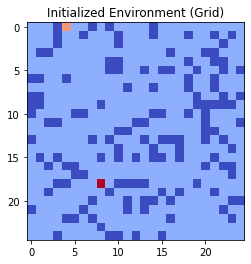

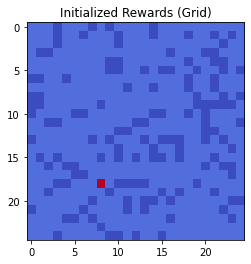

In [81]:
grid_size = 25
obstacle_ratio = 0.25
actions = ["up", "down", "left", "right"]
reward_def = -1
reward_goal = 100
reward_obstacle = -10
threshold = 1e-5
gamma = 0.8


grid, start, goal = prepare_grid(grid_size, obstacle_ratio)
plt.title("Initialized Environment (Grid)")
plt.imshow(grid, cmap='coolwarm')
plt.show()

rewards = reward_grid(grid, grid_size, reward_def, reward_goal, reward_obstacle)

plt.title("Initialized Rewards (Grid)")
plt.imshow(rewards, cmap='coolwarm')
plt.show()



In [78]:
def state_action(state, action, grid_size):
    x, y = state
    if (action == "up" and x > 0):
        return (x-1, y)
    elif (action == "down" and x < grid_size - 1):
        return (x+1, y)
    elif (action == "right" and y < grid_size - 1):
        return (x, y+1)
    elif (action == "left" and y > 0):
        return (x, y-1)
    return state

In [84]:
def value_iteration(rewards, gamma, threshold, goal, actions, grid_size):
    values = np.zeros_like(rewards, dtype=float)
    policy = np.empty_like(rewards, dtype=float)

    while (True):
        delta = 0
        for x in range(grid_size):
            for y in range(grid_size):
                if ((x, y) == goal or grid[x, y] == -1):
                    continue

                action_values = []
                for action in actions:
                    next_state = state_action((x, y), action, grid_size)
                    nx, ny = next_state
                    action_values.append(rewards[nx, ny] + gamma * values[nx, ny])
                
                best_action = actions[np.argmax(action_values)]
                best_value = max(action_values)
                delta = max(delta, abs(best_value - values[x, y]))
                # print(policy)
                print(next_state)

                values[x, y] = best_value
                policy[x, y] = best_action

        if delta < threshold:
            break

    return values, policy                

values_vi, policy_vi = value_iteration(rewards, gamma, threshold, goal, actions, grid_size)

(0, 1)


ValueError: could not convert string to float: 'up'